# Plot NSIDC Projections and Grids

This is an example of using the `nsidc_projections` package

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.path as mpath

import cartopy.feature as cfeature

from nsidc_projections.grid import (EASEGridNorth25km, EASEGridSouth25km, 
                                    EASEGrid2North25km, EASEGrid2South25km, 
                                    AVHRR_EASEGridNorth25km, AVHRR_EASEGridSouth25km,
                                    SSMI_PolarStereoNorth25km, SSMI_PolarStereoSouth25km,
                                    EASEGridGlobal25km, EASEGrid2Global25km) 

# For testing
from nsidc_projections.grid import get_cartopy_projclass
from nsidc_projections.grid_info import EASE_GRID25_HEIGHT, EASE_GRID25_WIDTH

In [3]:
def plot_projection(griddef, grid_outline=False, add_grid=False, every=20, fig=None, position=111, title=None):
    """Plots a projection and grid"""

    projection = griddef.to_cartopy()

    if fig == None:
        fig = plt.gcf()
        
    ax = fig.add_subplot(position, projection=projection)
    ax.set_global()

    # Sets plot boundary to allow plotting outside of map area
    # I use extent to set this
    extent = ax.get_extent()
    xy = np.array(list(zip(np.array(extent)[[0,1,1,0]], np.array(extent)[[3,3,2,2]])))
    ax.set_boundary(mpath.Path(xy), projection)

    # Add land and graticule
    ax.add_feature(cfeature.LAND, facecolor='0.5')
    ax.gridlines();

    if title:
        ax.set_title(title)
        
    # Plot boundary of grid
    if grid_outline:
        x, y = griddef.grid_bounds(xy=True)
        ax.plot(x+[x[0]], y+[y[0]], transform=projection);

    
    if add_grid:
        xg, yg = griddef.get_gridcell_edges()
        for xx in xg[::every]:
            ax.plot([xx, xx], [yg[0], yg[-1]], 'b', transform=projection)
        for yy in yg[::every]:
            ax.plot([xg[0], xg[-1]], [yy, yy], 'b', transform=projection)

## Plot EASE Grid North with the outline of the standard 25 km grid


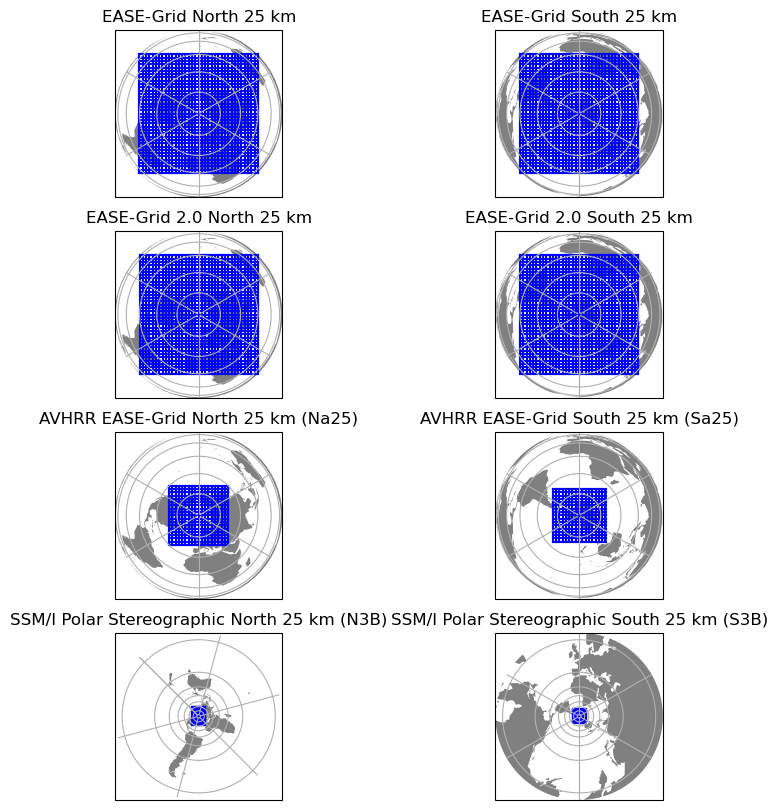

In [4]:
projections = [EASEGridNorth25km, EASEGridSouth25km, 
               EASEGrid2North25km, EASEGrid2South25km, 
               AVHRR_EASEGridNorth25km, AVHRR_EASEGridSouth25km,
               SSMI_PolarStereoNorth25km, SSMI_PolarStereoSouth25km]

fig = plt.figure(figsize=(9, 10))
for i, projection in enumerate(projections, 1):
    position = 420 + i
    plot_projection(projection, grid_outline=True, add_grid=True, fig=fig, position=position, title=projection.name)

In [5]:
projections = [EASEGridGlobal25km, EASEGrid2Global25km]

fig = plt.figure(figsize=(9, 8))
for i, projection in enumerate(projections, 1):
    position = 210 + i
    plot_projection(projection, grid_outline=True, add_grid=True, fig=fig, position=position, title=projection.name)

TypeError: LambertCylindrical.__init__() got an unexpected keyword argument 'true_scale_latitude'

<Figure size 900x800 with 0 Axes>

In [19]:
#extent = [0, 12741818.8772, 0, 12742455.951480325]
xmin = ymin = xmax = ymax = round(xg[-1]/10000.)*10000.
extent = np.array([xmin, xmax, ymin, ymax]) + np.array([-25000.*10, 25000*4, -25000.*10, 25000*4])

# Get x and y projected coordinates of grid cell boundarys
xg, yg = EASEGridNorth25km.get_gridcell_edges()
xc, yc = EASEGridNorth25km.get_coordinates()
xc, yc = np.meshgrid(xc, yc)

fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(projection=projection)
ax.set_extent(extent, projection)
#ax.set_global()

# Sets plot boundary to allow plotting outside of map area
# I use extent to set this
extent = ax.get_extent()
xy = np.array(list(zip(np.array(extent)[[0,1,1,0]], np.array(extent)[[3,3,2,2]])))
ax.set_boundary(mpath.Path(xy), projection)

ax.add_feature(cfeature.LAND, facecolor='0.5')
ax.gridlines(zorder=0);

# Plot boundary of grid
x, y = EASEGridNorth25km.grid_bounds(xy=True)
ax.plot(x+[x[0]], y+[y[0]], transform=projection);
for xx in xg:
    ax.plot([xx, xx], [yg[0], yg[-1]], 'b', transform=projection)
for yy in yg:
    ax.plot([xg[0], xg[-1]], [yy, yy], 'b', transform=projection)
ax.plot(xc, yc, '+k', transform=projection);

NameError: name 'xg' is not defined